In [48]:

import pathlib


path=str(pathlib.Path().resolve())+"/nombres_dinosaurios.txt"
path

'C:\\Users\\diego.guizanlopez\\Documents\\BigDataEIa\\IA\\Modelo_IA\\2º_Trimestre\\Tokenizacion\\Dinosaurios10-01/nombres_dinosaurios.txt'

In [49]:
#Sacamos toda la combinación posible de caracteres
text=open(path).read().lower().replace('\n','.')
text

'aachenosaurus.aardonyx.abdallahsaurus.abelisaurus.abrictosaurus.abrosaurus.abydosaurus.acanthopholis.achelousaurus.acheroraptor.achillesaurus.achillobator.acristavus.acrocanthosaurus.acrotholus.actiosaurus.adamantisaurus.adasaurus.adelolophus.adeopapposaurus.aegyptosaurus.aeolosaurus.aepisaurus.aepyornithomimus.aerosteon.aetonyxafromimus.afrovenator.agathaumas.aggiosaurus.agilisaurus.agnosphitys.agrosaurus.agujaceratops.agustinia.ahshislepelta.airakoraptor.ajancingenia.ajkaceratops.alamosaurus.alaskacephale.albalophosaurus.albertaceratops.albertadromeus.albertavenator.albertonykus.albertosaurus.albinykus.albisaurus.alcovasaurus.alectrosaurus.aletopelta.algoasaurus.alioramus.aliwalia.allosaurus.almas.alnashetri.alocodon.altirhinus.altispinax.alvarezsaurus.alwalkeria.alxasaurus.amargasaurus.amargastegos.amargatitanis.amazonsaurus.ammosaurus.ampelosaurus.amphicoelias.amphicoelicaudia.amphisaurus.amtocephale.amtosaurus.amurosaurus.amygdalodon.anabisetia.anasazisaurus.anatosaurus.anatotita

In [50]:
vocabulario=sorted(list(set(text)))
len_datos, len_vocabulario = len(text),len(vocabulario)

In [51]:
#Creamos un mapa para cada uno de los diferentes valores
stoi = {ch:i for i,ch in enumerate(vocabulario)}
itos = {i:ch for i,ch in enumerate(vocabulario)}
print(stoi)
print(itos)

{'.': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}
{0: '.', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}


In [54]:
#Creamos en NumPy una tabla con los valores
from pprint import pprint
import numpy as np


N = np.zeros((len_vocabulario,len_vocabulario),dtype=np.int32)
#for i in range(len_vocabulario):
#    for j in range(len_vocabulario):
#        bigrama = itos[i] + itos[j]
#        N[i,j] = text.count(bigrama)
        
for i in range(len_datos-1):
    bigrama = text[i] + text[i+1]
    fila = stoi[text[i]]
    col = stoi[text[i+1]]
    N[fila,col] += 1


array([[   0,  165,   75,  109,   81,   65,   21,   61,   64,   24,   26,
          40,   82,   91,   48,   41,  125,   10,   40,  146,   99,   18,
          21,   17,   16,   24,   26],
       [ 138,   11,   24,  100,   36,   42,    6,   40,   17,   23,    5,
          20,  138,   68,  347,   22,   89,    3,  124,  171,  204,  791,
          30,    6,   12,   12,    8],
       [   0,   41,    2,    0,    3,   33,    0,    0,    0,   22,    0,
           0,    5,    0,    0,   17,    0,    0,   26,    2,    0,   14,
           0,    0,    0,    6,    0],
       [   0,   62,    0,    2,    0,  116,    0,    0,  166,   21,    0,
           2,   11,    0,    3,   84,    0,    0,   37,    2,   17,   16,
           0,    0,    0,    0,    0],
       [   1,   43,    0,    2,    1,   37,    0,    0,    4,   40,    0,
           0,    0,    3,    1,  129,    0,    0,   42,    2,    0,   11,
           0,    1,    0,   23,    1],
       [  14,   12,    4,   24,   13,    5,    2,   24,    6,   4

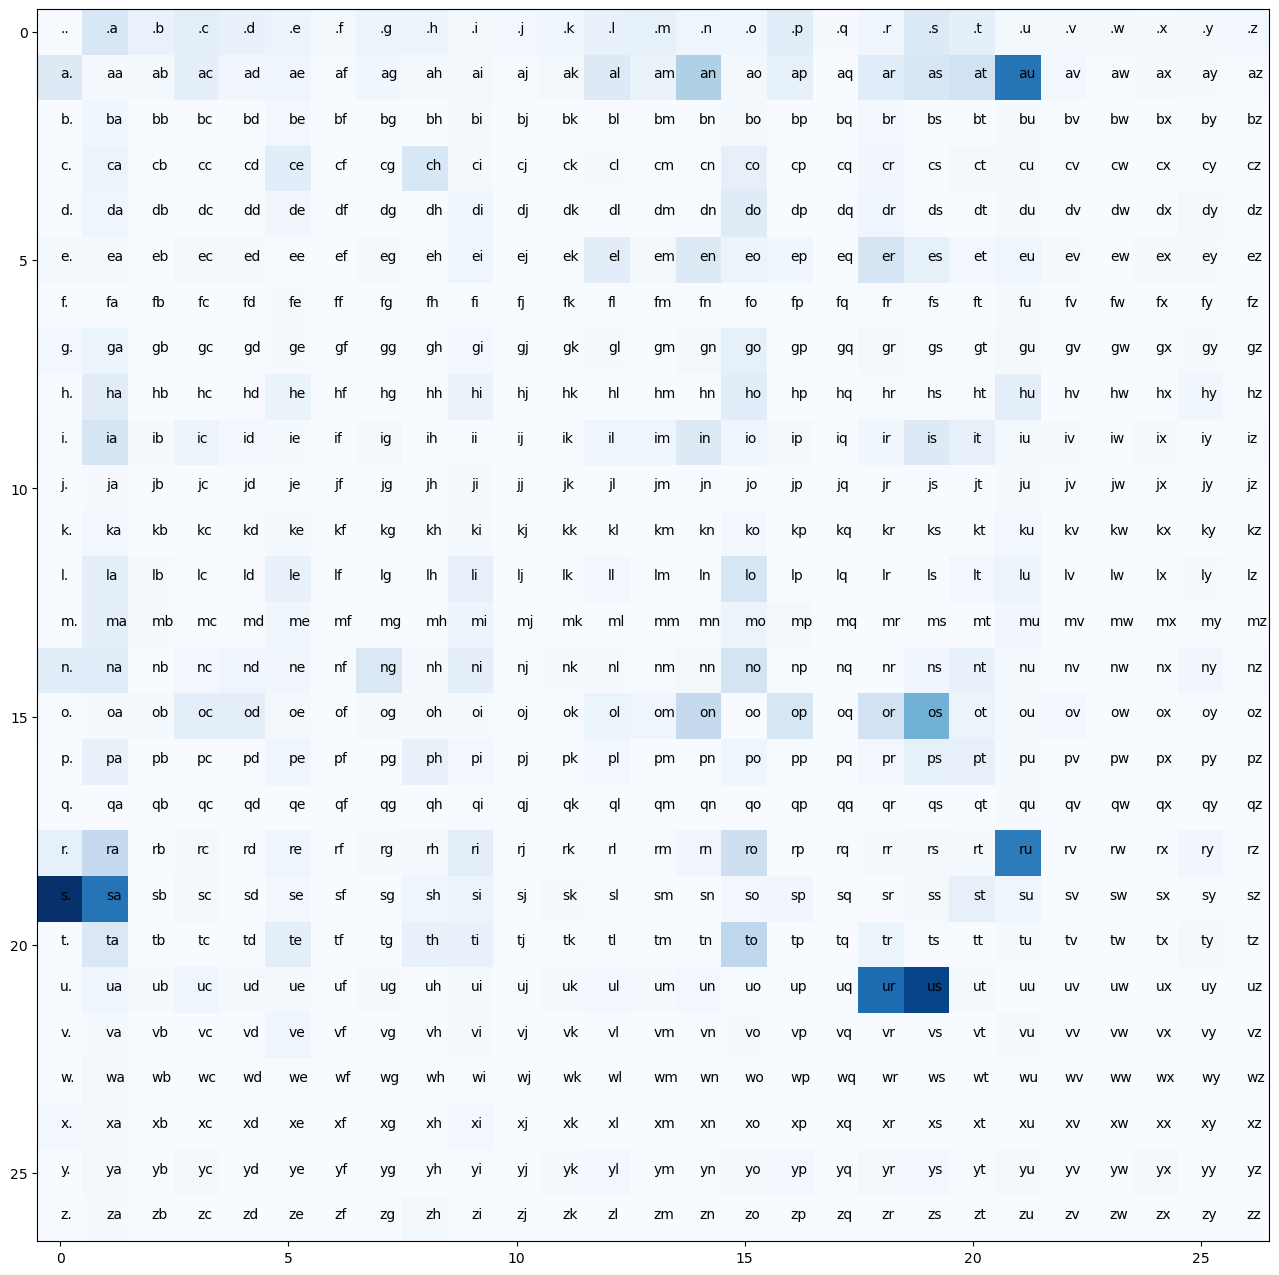

In [65]:
from matplotlib import pyplot as plt

#Combinación de letras y veces que aparecen

plt.figure(figsize=(16,16))
plt.imshow(N,cmap="Blues",)
for i in range(len_vocabulario):
    for j in range(len_vocabulario):
        bigrama = itos[i] + itos[j]
        plt.text(j,i,bigrama,ha="center",va="center")